# Artificial Neural Network

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
tf.__version__

'2.9.2'

Data Preprocessing

### Importing the dataset

In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

### Encoding categorical data

Label Encoding the "Gender" column

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [8]:
print(X[0])

[619 'France' 0 42 2 0.0 1 1 1 101348.88]


One Hot Encoding the "Geography" column

In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [10]:
print(X[0])

[1.0 0.0 0.0 619 0 42 2 0.0 1 1 1 101348.88]


### Splitting the dataset into the Training set and Test set

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Feature Scaling

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
print(X_train)

[[-1.01460667 -0.5698444   1.74309049 ...  0.64259497 -1.03227043
   1.10643166]
 [-1.01460667  1.75486502 -0.57369368 ...  0.64259497  0.9687384
  -0.74866447]
 [ 0.98560362 -0.5698444  -0.57369368 ...  0.64259497 -1.03227043
   1.48533467]
 ...
 [ 0.98560362 -0.5698444  -0.57369368 ...  0.64259497 -1.03227043
   1.41231994]
 [-1.01460667 -0.5698444   1.74309049 ...  0.64259497  0.9687384
   0.84432121]
 [-1.01460667  1.75486502 -0.57369368 ...  0.64259497 -1.03227043
   0.32472465]]


In [14]:
# get number of input 
X_train[0].shape

(12,)

Building the ANN

### Initializing the ANN

In [15]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [16]:
ann.add(tf.keras.layers.Dense(units=12, activation='relu', input_shape=X_train[0].shape))

### Adding the second hidden layer

In [17]:
ann.add(tf.keras.layers.Dense(units=8, activation='relu'))

### Adding the output layer

In [18]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

### Visualize Model

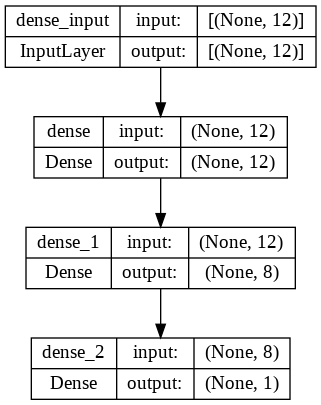

In [19]:
from tensorflow.keras.utils import plot_model
plot_model(ann,
          to_file="model.png",
          show_shapes=True,
          show_layer_names=True,
          )

Training the ANN

### Compiling the ANN

In [20]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the ANN on the Training set

In [21]:
a=ann.fit(X_train, y_train, batch_size = 32, epochs = 100,validation_data=(X_test,y_test))

Epoch 1/100
250/250 [==============================] - 1s 3ms/step - loss: 0.5126 - accuracy: 0.7768 - val_loss: 0.4388 - val_accuracy: 0.7960
Epoch 2/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4318 - accuracy: 0.8056 - val_loss: 0.4180 - val_accuracy: 0.8240
Epoch 3/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4173 - accuracy: 0.8177 - val_loss: 0.4079 - val_accuracy: 0.8285
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4072 - accuracy: 0.8265 - val_loss: 0.3988 - val_accuracy: 0.8340
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3991 - accuracy: 0.8285 - val_loss: 0.3907 - val_accuracy: 0.8350
Epoch 6/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3925 - accuracy: 0.8311 - val_loss: 0.3868 - val_accuracy: 0.8345
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3858 - accuracy: 0.8344 - val_loss: 0.3787 - val_accuracy: 0.8445

In [22]:
print(a.history['loss'])

[0.5125579833984375, 0.43182894587516785, 0.4172944128513336, 0.40723931789398193, 0.399148166179657, 0.3925098180770874, 0.3858077824115753, 0.38024160265922546, 0.37394315004348755, 0.36794254183769226, 0.3624316453933716, 0.3570793569087982, 0.3524549603462219, 0.34947705268859863, 0.3465811610221863, 0.3443745970726013, 0.34328097105026245, 0.3421613276004791, 0.34118470549583435, 0.3405432105064392, 0.3395479917526245, 0.3384743630886078, 0.3372991383075714, 0.33733639121055603, 0.33655479550361633, 0.33640941977500916, 0.33604758977890015, 0.33527255058288574, 0.33488979935646057, 0.3347806930541992, 0.33475184440612793, 0.3340744972229004, 0.3341352641582489, 0.3337891697883606, 0.3330644369125366, 0.33353692293167114, 0.3325643837451935, 0.3331049978733063, 0.3326133191585541, 0.33235907554626465, 0.3320157825946808, 0.33149945735931396, 0.33154231309890747, 0.33164823055267334, 0.3311571180820465, 0.33115240931510925, 0.33090922236442566, 0.33081743121147156, 0.330356955528259

## Part 4 - Making the predictions and evaluating the model

### Predicting the result of a single observation

Use our ANN model to predict if the customer with the following informations will leave the bank: 

Geography: Spain

Credit Score: 600

Gender: Male

Age: 40 years old

Tenure: 3 years

Balance: \$ 60000

Number of Products: 2

Does this customer have a credit card ? Yes

Is this customer an Active Member: Yes

Estimated Salary: \$ 50000

So, should we say goodbye to that customer ?

In [23]:
print(ann.predict(sc.transform([[0, 1, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])))

1/1 [==============================] - 0s 76ms/step
[[0.01219232]]


In [24]:
print(ann.predict(sc.transform([[0, 0, 1, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

1/1 [==============================] - 0s 17ms/step
[[False]]


In [29]:
!pip install autokeras

import autokeras as ak

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 162 kB 6.2 MB/s 
     |████████████████████████████████| 135 kB 32.1 MB/s 
     |████████████████████████████████| 1.6 MB 42.5 MB/s 


In [35]:
reg = ak.StructuredDataClassifier(
    overwrite=True, max_trials=3
) 

data=reg.fit(
    X_train,y_train,
          validation_data=(X_test,y_test),
          batch_size=128,epochs=50
)
print(data)

Trial 3 Complete [00h 00m 17s]
val_accuracy: 0.847000002861023

Best val_accuracy So Far: 0.847000002861023
Total elapsed time: 00h 00m 56s
Epoch 1/50
63/63 [==============================] - 1s 7ms/step - loss: 0.5402 - accuracy: 0.7730 - val_loss: 0.4891 - val_accuracy: 0.7975
Epoch 2/50
63/63 [==============================] - 0s 4ms/step - loss: 0.4783 - accuracy: 0.7960 - val_loss: 0.4630 - val_accuracy: 0.7975
Epoch 3/50
63/63 [==============================] - 0s 4ms/step - loss: 0.4621 - accuracy: 0.7970 - val_loss: 0.4490 - val_accuracy: 0.8000
Epoch 4/50
63/63 [==============================] - 0s 4ms/step - loss: 0.4511 - accuracy: 0.8020 - val_loss: 0.4373 - val_accuracy: 0.8060
Epoch 5/50
63/63 [==============================] - 0s 4ms/step - loss: 0.4398 - accuracy: 0.8095 - val_loss: 0.4242 - val_accuracy: 0.8160
Epoch 6/50
63/63 [==============================] - 0s 4ms/step - loss: 0.4261 - accuracy: 0.8171 - val_loss: 0.4083 - val_accuracy: 0.8265
Epoch 7/50
63/63 [==

In [36]:
print(data)

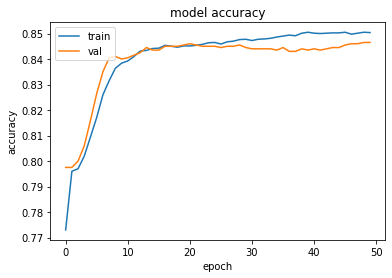

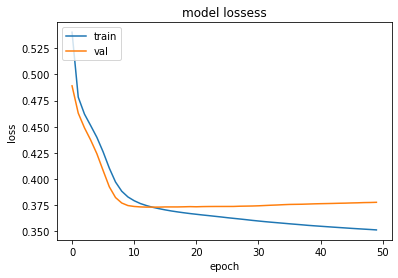

In [37]:
import matplotlib.pyplot as plt
plt.plot(data.history['accuracy'])
plt.plot(data.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
#model_Updated.evaluate(Validation_data)
plt.plot(data.history['loss'])
plt.plot(data.history['val_loss'])
plt.title('model lossess')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
#model_Updated.evaluate(Validation_data)